## Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

#cs = pd.read_csv('drive/My Drive/Colab Notebook/Big Data Machine Learning/Train.csv')

cs = pd.read_csv('drive/My Drive/Big Data ML/Train.csv')
cs_new = cs.drop('ID',axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

## EDA

In [ ]:
cs.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
cs.shape

(8068, 11)

In [ ]:
cs.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

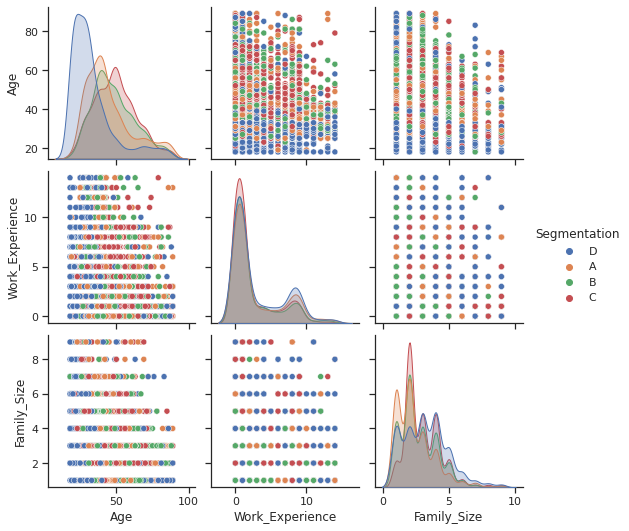

In [ ]:
cs_new = cs.drop('ID',axis=1)

import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(cs_new, hue="Segmentation")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9df894ef10>,
      dtype=object)

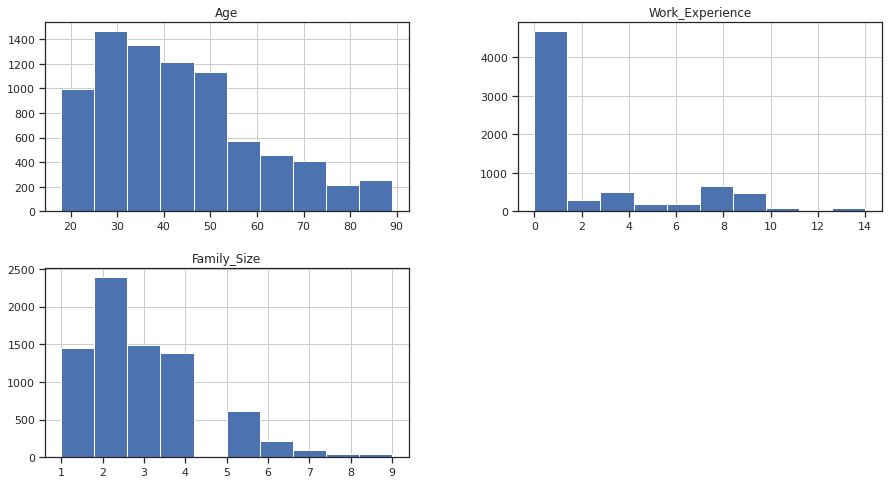

In [ ]:
cs_new.hist(grid=True,figsize=(15,8))

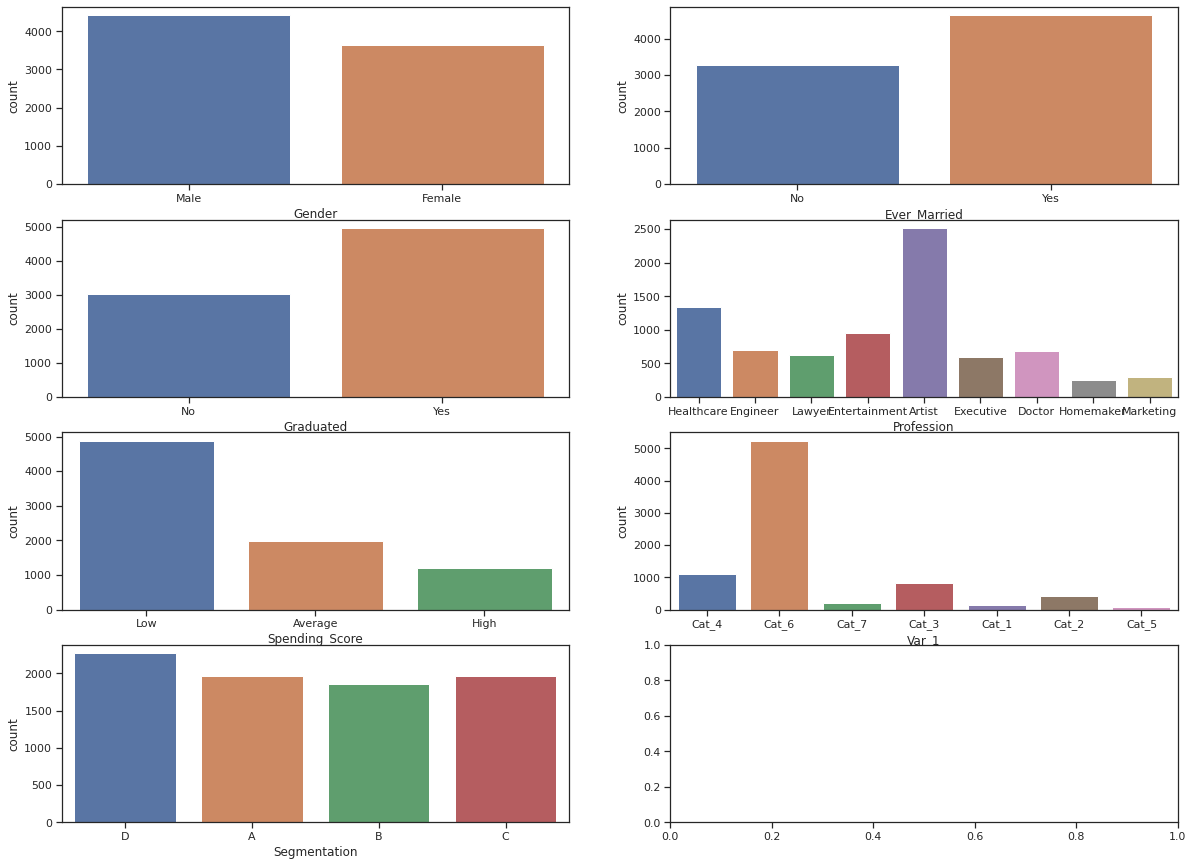

In [ ]:
from matplotlib import pyplot as plt
import math
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
temp = cs_new.drop(columns=['Age','Work_Experience','Family_Size'])
j = 0
for i in temp.columns:
  sns.set_style("darkgrid")
  sns.axes_style("whitegrid")
  sns.countplot(ax=axes[math.floor(j/2), j%2],data=temp,x=i)
  # sns.histplot(ax=axes[math.floor(j/2), j%2],data=temp, x=i, hue="Segmentation", multiple="stack")
  j=j+1

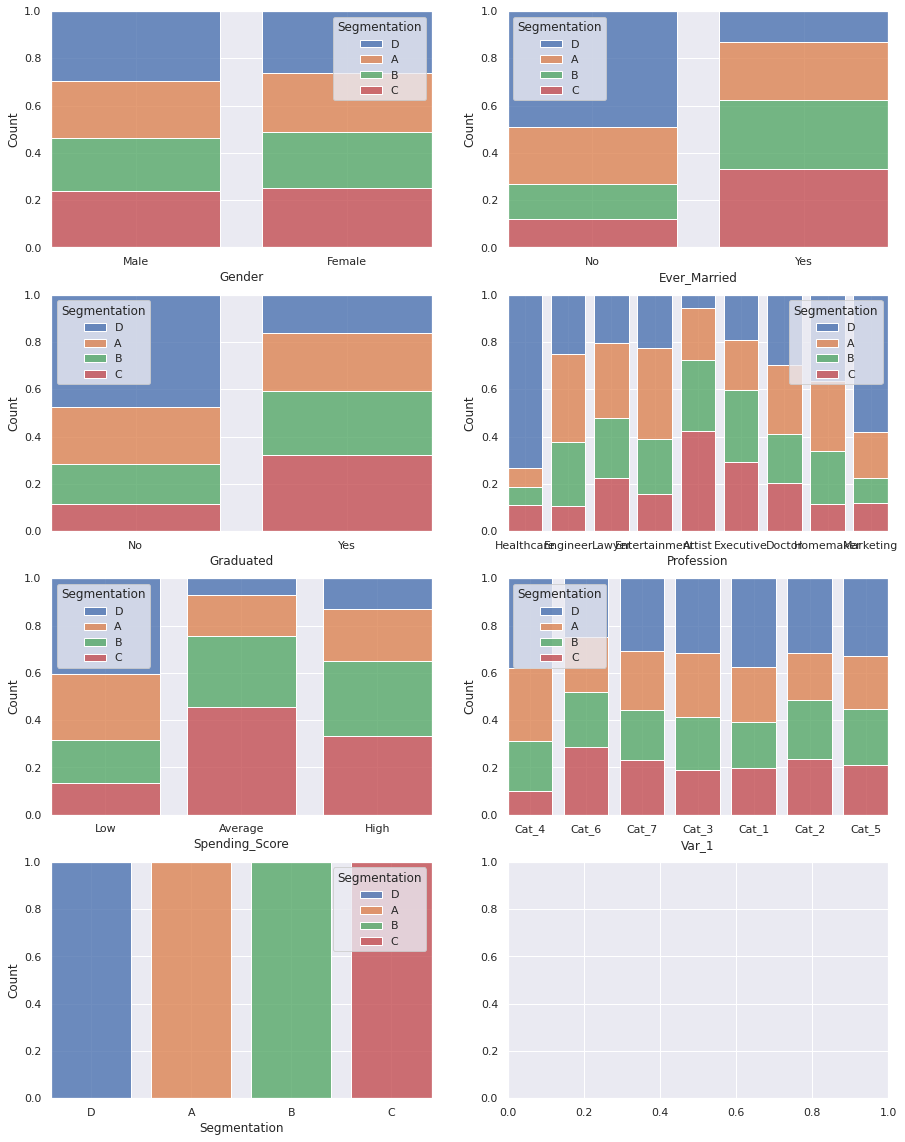

In [ ]:
from matplotlib import pyplot as plt
import math
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
temp = cs_new.drop(columns=['Age','Work_Experience','Family_Size'])
j = 0
for i in temp.columns:
  sns.set_style("darkgrid")
  sns.axes_style("whitegrid")
  sns.histplot(ax=axes[math.floor(j/2), j%2],data=cs_new, x=i, hue="Segmentation", multiple="fill",shrink=.8, alpha=.8)
  j=j+1

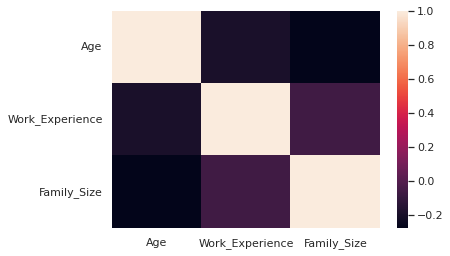

In [ ]:
sns.heatmap(cs_new.corr())

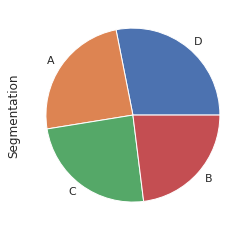

In [ ]:
cs['Segmentation'].value_counts().plot.pie()

In [ ]:
cs['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

## Preprocess

In [ ]:
# cs_new = cs.drop('ID',axis=1)

# cs_new['Ever_Married'] = cs_new['Ever_Married'].fillna('unstated')
# cs_new['Graduated'] = cs_new['Graduated'].fillna('unstated')
# cs_new['Profession'] = cs_new['Profession'].fillna('unstated')
cs_new['Work_Experience'] = cs_new['Work_Experience'].fillna(cs_new["Work_Experience"].value_counts().nlargest(n=1).index[0])
cs_new['Family_Size'] = cs_new['Family_Size'].fillna(cs_new['Family_Size'].value_counts().nlargest(n=1).index[0])
cs_new['Var_1'] = cs_new['Var_1'].fillna(cs_new['Var_1'].value_counts().nlargest(n=1).index[0])
print(cs_new.isna().sum())
print(cs_new.head())

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64
   Gender Ever_Married  Age  ... Family_Size  Var_1  Segmentation
0    Male           No   22  ...         4.0  Cat_4             D
1  Female          Yes   38  ...         3.0  Cat_4             A
2  Female          Yes   67  ...         1.0  Cat_6             B
3    Male          Yes   67  ...         2.0  Cat_6             B
4  Female          Yes   40  ...         6.0  Cat_6             A

[5 rows x 10 columns]


In [ ]:
cs_2=pd.get_dummies(cs_new[['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']],dummy_na=False)

In [ ]:
cs_2[['Age','Work_Experience','Family_Size','Segmentation']]=cs_new[['Age','Work_Experience','Family_Size','Segmentation']]
cs_2.head()

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Age,Work_Experience,Family_Size,Segmentation
0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,22,1.0,4.0,D
1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,38,1.0,3.0,A
2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,67,1.0,1.0,B
3,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,67,0.0,2.0,B
4,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,40,1.0,6.0,A


In [ ]:
cs_2.drop('Var_1_Cat_7',axis=1)

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Age,Work_Experience,Family_Size,Segmentation
0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,22,1.0,4.0,D
1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,38,1.0,3.0,A
2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,67,1.0,1.0,B
3,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,67,0.0,2.0,B
4,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,40,1.0,6.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,22,0.0,7.0,D
8064,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,35,3.0,4.0,D
8065,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,33,1.0,1.0,D
8066,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,27,1.0,4.0,B


In [ ]:
from sklearn.model_selection import train_test_split

X, y = cs_2.iloc[:,cs_2.columns != 'Segmentation'].values, cs_2.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y)

## Chooose best algorithm and best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('sc', StandardScaler()),     
    ('knn', KNeighborsClassifier(algorithm='brute'))])

params = {'knn__n_neighbors': [11, 21, 31, 41, 51]} # usually odd numbers

clf = GridSearchCV(estimator=pipe,           
                      param_grid=params, 
                      cv=5,
                      return_train_score=True) # Turn on cv train scores
clf = clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)

0.5054553653670494
{'knn__n_neighbors': 21}


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0, n_jobs=-1)

lr=[0.1,0.2,0.3] 
# ne=[50,75,100,125,150] 
md=[2,3,4,5] 
param_grid = {'learning_rate': lr,'max_depth': md},            

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, refit=True, n_jobs=-1)
gs = gs.fit(X, y)


print(gs.best_score_)
print(gs.best_params_)

0.5399126213517648
{'learning_rate': 0.3, 'max_depth': 3}


In [ ]:
xgb_final=XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.3, max_depth=3)
xgb_final.fit(X_train,y_train)
y_pre = xgb_final.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pre)

0.5340768277571252

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100)

md = [5,10,15,20]
param_grid = {'max_depth':md}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, refit=True, n_jobs=-1)
gs = gs.fit(X, y)


print(gs.best_score_)
print(gs.best_params_)

0.5328464282229807
{'max_depth': 10}


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='sgd',learning_rate='adaptive')

hls = [2,3,5,7,10]
act = ['identit','logistic','tanh','relu']
param_grid = {'hidden_layer_sizes':hls,'activation':act}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, refit=True, n_jobs=-1)
gs = gs.fit(X, y)


print(gs.best_score_)
print(gs.best_params_)

0.47892671916760576
{'activation': 'logistic', 'hidden_layer_sizes': 10}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Apply cluster algorithm KMedoids

# !pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

KM = KMedoids(n_clusters = 4, init = 'k-medoids++')

cs_2['cluster_result']=KM.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


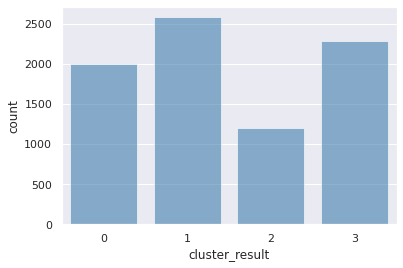

In [ ]:
sns.countplot(cs_2['cluster_result'],color="#3182BD",alpha=0.6)

In [ ]:
X_aft_c, y_aft_c = cs_2.iloc[:,cs_2.columns != 'Segmentation'].values, cs_2.iloc[:, cs_2.columns == 'Segmentation'].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('sc', StandardScaler()),     
    ('knn', KNeighborsClassifier(algorithm='brute'))])

params = {'knn__n_neighbors': [11, 21, 31, 41, 51]} # usually odd numbers

clf = GridSearchCV(estimator=pipe,           
                      param_grid=params, 
                      cv=5,
                      return_train_score=True) # Turn on cv train scores
clf = clf.fit(X_aft_c, y_aft_c)
print(clf.best_score_)
print(clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

0.5069422005683377
{'knn__n_neighbors': 21}


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0, n_jobs=-1)

lr=[0.1,0.2,0.3] 
# ne=[50,75,100,125,150] 
md=[2,3,4,5] 
param_grid = {'learning_rate': lr,'max_depth': md},            

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, refit=True, n_jobs=-1)
gs = gs.fit(X_aft_c, y_aft_c)


print(gs.best_score_)
print(gs.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5401603760032143
{'learning_rate': 0.1, 'max_depth': 4}


After trying different algorithms and tuning the parameters, we find that XGBclassifier generates the best result when learning rate is 0.1 and max depth is 4.

Applying cluster method before segmentation does not increase the accuracy.

In [ ]:
from xgboost import XGBClassifier

best_xgb = XGBClassifier(random_state=0, n_jobs=-1,learning_rate=0.3,max_depth=3)

best_xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
test = pd.read_csv('drive/My Drive/Big Data Machine Learning/Test.csv')
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [ ]:
train=pd.read_csv('drive/My Drive/Big Data Machine Learning/Train.csv')

test.join(train['ID'],on='ID',how='inner',lsuffix='_left', rsuffix='_right')



,ID,ID_left,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,ID_right


In [ ]:
test_new = test.drop('ID',axis=1)
test_new['Work_Experience'] = test_new['Work_Experience'].fillna(test_new["Work_Experience"].value_counts().nlargest(n=1).index[0])
test_new['Family_Size'] = test_new['Family_Size'].fillna(test_new['Family_Size'].value_counts().nlargest(n=1).index[0])
test_new['Var_1'] = test_new['Var_1'].fillna(test_new['Var_1'].value_counts().nlargest(n=1).index[0])
test_2=pd.get_dummies(test_new[['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']],dummy_na=False)
test_2[['Age','Work_Experience','Family_Size']]=test_new[['Age','Work_Experience','Family_Size']]
test_2.head()

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Age,Work_Experience,Family_Size
0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,36,0.0,1.0
1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,37,8.0,4.0
2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,69,0.0,1.0
3,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,59,11.0,2.0
4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,19,1.0,4.0


In [ ]:
test_pred_result=best_xgb.predict(test_2.values)

In [ ]:
result = pd.DataFrame()
result['ID'] = test['ID']
result['Segmentation'] = test_pred_result
train_temp = cs[['ID','Segmentation']]
result=result.merge(train_temp,on='ID',how='left')

result['Segmentation_y'] = result['Segmentation_y'].fillna('x')
for i in range(len(result)):
    if result.iloc[i,2] != 'x':
        result.iloc[i,1] = result.iloc[i,2]

result=result[['ID','Segmentation_x']]
result=result.rename(columns={"Segmentation_x": "Segmentation"})
result.head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C


In [ ]:
result.to_csv('drive/My Drive/Big Data Machine Learning/XGB_BEST_SUBMISSION_TUNED.csv',index = False)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pre,labels=["A", "B", "C","D"])
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[180  90  36  88]
 [ 97 124 112  39]
 [ 43  66 230  55]
 [ 88  27  11 328]]


In [ ]:
confusion = pd.DataFrame(confusion)
confusion = confusion.rename(columns={0: "A", 1: "B",2:"C",3:"D"})
confusion = confusion.rename(index={0: "A", 1: "B",2:"C",3:"D"})
confusion

,A,B,C,D
A,180,90,36,88
B,97,124,112,39
C,43,66,230,55
D,88,27,11,328


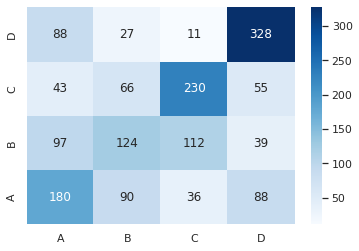

In [ ]:
cm = sns.heatmap(confusion,annot = True,fmt="d",cmap="Blues")
cm.invert_yaxis()